# Geometriske objekter

En liten gjennomgang av geometriske objekter som brukt i Python med [Shapely](https://shapely.readthedocs.io/en/stable/manual.html).

## Data modell

![Spatial data model](https://autogis-site.readthedocs.io/en/latest/_images/simple-features_595x500px.svg)

`Punkt(Points)`, `Linjer(Lines)` og `Polygoner(Polygons)` er fundamentale geometriske objekter når vi jobber med romlig data i vektor format. I Python er [Shapely](https://shapely.readthedocs.io/en/stable/manual.html) modulen som brukes for å utføre diverse geometriske operasjoner.

**Geometriske objekter består av koordinattuppler hvor:**

-  `Point` -objektet representerer et enkelt punkt i et rom. Punkt kan være enten todimensjonale (x, y) eller tredimensjonale (x, y, z).
-  `LineString` -objektet representerer en sekvens av punkt som er koblet sammen og former en linje. En linje består dermed av en liste med minst to koordinattuppler.
-  `Polygon` -objektet representerer et fyllt område som består av en liste med misnt tre koordinattuppler som utgjør den ytre ringen (og potensielt en liste med "hull-polygoner".

**Det er også mulig å ha en samling med geometriske objekter (f.eks. et polygon med flere bestanddeler):**

-  `MultiPoint` -objektet representerer en samling med punkt og består av en liste med koordinattuppler.
-  `MultiLineString` -objektet representerer en samling med linjer og består av en liste med liste med linjelignende sekvenser.
-  `MultiPolygon` -objektet representerer en samling med polygoner som består av en lsite med polygonlignende sekvenser.

**Nyttige attributter og metoder i Shapely:**

-  Å lage linjer og polygoner fra en samling med punktobjekter.
-  Å regne ut areal/lengde/grenser osv. av geometrier.
-  Å utføre geometriske operasjoner fra input-geometrier så som; `union`, `difference`, `distance` osv.
-  Å utføre romlige spørringer mellom geometrier så som; `intersects`, `touches`, `crosses`, `within` osv.


<div class="alert alert-info">

**Tuppler**

En [Tuppel](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences) er en datastruktur i Python som består av et antall verdier separert av komma. Koordinatpar er ofte representert som tuppler. For eksempel:

```
(59.66539, 10.77604)
``` 

</div>


## Punkt

Punkt lages lett å lage, ved å gi `Point()`-objektet x- og y-koordinater:

In [1]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
punkt1 = Point(2.2, 4.2)
punkt2 = Point(7.2, -25.1)
punkt3 = Point(9.26, -2.456)
punkt3D = Point(9.26, -2.456, 0.57)

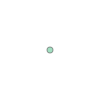

In [2]:
punkt1

Jupyter viser objektet direkte, men vi kan også få mer informasjon om definisjonen av disse objektene:

In [3]:
print(punkt1)
print(punkt3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


3D-punkt kan kjennes igjen ved hjelp av Z-bokstaven foran koordinatene.

Vi kan også finne ut datatypen for objektet:

In [4]:
type(punkt1)

shapely.geometry.point.Point

Her ser vi at objektet er et Shapely Point. Point-objektet er representert i et spesifikt format basert på [GEOS](https://trac.osgeo.org/geos) C++ biblioteket som er et av standardbibliotekene som brukes av ulike GIS-programmer. Det brukes blant annet som standard i [QGIS](http://www.qgis.org/en/site/). 

### Punkt attributter og funksjoner

Punkt og andre shapely objekter har innebygde [attributter og funkjoner](https://shapely.readthedocs.io/en/stable/manual.html#general-attributes-and-methods). Med de tilgjengelige attributtene kan vi blant annet trekke ut koordinatverdiene og regne ut avstanden mellom ulike punkt.

`geom_type` attributten inneholder informasjon om geometritypen til et Shapely objekt:

In [5]:
punkt1.geom_type

'Point'

Man kan trekke ut koordinatene fra et Point på flere måter:

`coords` attributtet inneholder blant annet informasjon om `CoordinateSequence`, en annen Shapely datatype:

In [6]:
# Get xy coordinate tuple
list(punkt1.coords)

[(2.2, 4.2)]

In [7]:
# Read x and y coordinates separately
x = punkt1.x
y = punkt1.y

In [8]:
print( x, y)

2.2 4.2


Man kan også regne ut avstanden mellom to objekter med [distance](https://shapely.readthedocs.io/en/stable/manual.html#object.distance) metoden. I dette eksemplet er avstanden målt i et kartesisk koordinatsystem. Når man jobber med ekte GIS-data er avstanden basert på koordinatsystemet som brukes. Man bør alltid sjekke hva som er måleenheten (meter, grader, osv.) i koordinatsystemet som brukes.

La oss sjekke avstanden mellom `punkt1` og `punkt2`:

In [9]:
# Check input data
print(punkt1)
print(punkt2)

POINT (2.2 4.2)
POINT (7.2 -25.1)


In [10]:
# Calculate the distance between point1 and point2
avstand = punkt1.distance(punkt2)

# Print out a nicely formatted info message
print(f"Avstanden mellom punktene er {avstand} enheter.")

Avstanden mellom punktene er 29.723559679150142 enheter.


## LineString

Fremgangsmåten for å lage LineString-objekter er ganske lik Shapely Point.

Istedet for et enkelt koordinattuppel bruker vi her en liste med Shapely Point eller er list med koordinattuppler:

In [11]:
# Create a LineString from our Point objects
linje = LineString([punkt1, punkt2, punkt3])

In [12]:
# It is also possible to produce the same outcome using coordinate tuples
linje2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [13]:
# Check if lines are identical
linje == linje2 

True

La oss se hvordan linjen vår ser ut: 

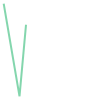

In [14]:
linje

In [15]:
print(linje)

LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


Som vi kan se så består `linje`-variablen vår av flere koordinatpar.

In [16]:
# Check data type of the line object
type(linje)

shapely.geometry.linestring.LineString

In [17]:
# Check geometry type of the line object
linje.geom_type

'LineString'

### LineString attributter og funksjoner


`LineString` -objekter har mange nyttige innebygde attributter og funksjoner. Vi kan for eksempel trekke ut koordinatene eller lenden på en linje, finne midtpunktet, lage punkter langs linjen med gitte mellomrom, eller regne ut den minste avstanden fra linjen til et punkt. Alle funksjonene er videre definert i [Shapely documentasjonen](http://toblerity.org/shapely/manual.html).

Vi kan trekke ut koordinatene fra en LineString på samme måte som med et `Point`.

In [18]:
# Get xy coordinate tuples
list(linje.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

Her har vi igjen en liste med koordinattuppler.

Hvis vi vil bruke de individuelle x- eller y-koordinatene i linjen, kan vi bruke `xy`-attributten: 

In [19]:
# Extract x and y coordinates separately
xkoordinater = list(linje.xy[0])
ykoordinater = list(linje.xy[1])

In [20]:
print(xkoordinater)
print(ykoordinater)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


Vi kan også hente ut spesifikke attributter, så som lengden av linjen og midtpunktet:

In [21]:
# Get the lenght of the line
linje_lengden = linje.length
print(f"Lengden på linjen vår er: {linje_lengden} enheter")

Lengden på linjen vår er: 52.46106912939557 enheter


In [22]:
# Get the centroid of the line
print(linje.centroid)

POINT (6.229961354035622 -11.892411157572392)


Som vi kan se, så er midtpunktet også et Shapely Point-objekt.

## Polygon

`Polygon` -objektet følger samme logikk som `Point` og `LineString`, bare at Polygon-objektet tar en sekvens av koordinater som input.

Polygoner trenger **minst tre koordinattuppler**:

In [23]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

La oss se hvordan polygonet vårt ser ut:

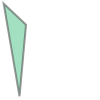

In [24]:
poly

In [25]:
print(poly)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [26]:
# Data type
type(poly)

shapely.geometry.polygon.Polygon

In [27]:
# Geometry type
poly.geom_type

'Polygon'

Vi kan også lage polygoner med hull:

In [28]:
# Define the outer border
border = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [29]:
# Outer polygon
world = Polygon(shell=border)
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


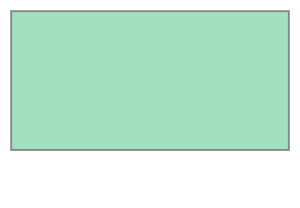

In [30]:
world

In [31]:
# La oss lage et stort hull hvor vi har ti enheter fra kanten
# NB: man kan ha flere hull, så vi må gi en liste med hullkoordinatene i en liste
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

In [32]:
# Nå kan vi sette sammen polygonet vårt med hullet inni.
frame = Polygon(shell=border, holes=hole)
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


La oss se hva vi har:

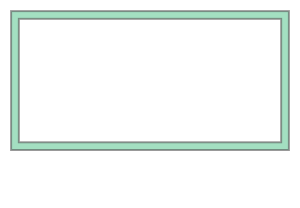

In [33]:
frame

In [34]:
print(frame)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


Som vi kan se, så har polygonet nå to sett med koordinattuppler. Det første representerer det ytterste, og det andre representererer hullet inni polygonet.

### Polygon attributter og funksjoner

Vi kan også med polygoner bruke attributtene direkte fra `Polygon`-objektet, noe som kan være nyttig for ulike typer analyser. For eksempel: `area`, `centroid`, `bounding box`, `exterior`, og `exterior-length`. Den fulle listen av metoder finner du i [Shapely User Manual](https://shapely.readthedocs.io/en/stable/manual.html#the-shapely-user-manual).

La oss se på noen av attributtene her:

In [35]:
# Print the outputs
print(f"Polygon centroid: {world.centroid}")
print(f"Polygon Area: {world.area}")
print(f"Polygon Bounding Box: {world.bounds}")
print(f"Polygon Exterior: {world.exterior}")
print(f"Polygon Exterior Length: {world.exterior.length}")

Polygon centroid: POINT (0 0)
Polygon Area: 64800.0
Polygon Bounding Box: (-180.0, -90.0, 180.0, 90.0)
Polygon Exterior: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Polygon Exterior Length: 1080.0


Som vi kan se, er det forholdsvis enkelt å hente ut de ulike attributtene fra `Polygon`-objektet. Merk at avstandsmålene vil gi mer mening når man jobber med data i et projisert koordinatsystem.